In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('/Users/yangziyu/Data_science/basketball/baskeball_detail_luoyang.csv')
df2=pd.read_csv('/Users/yangziyu/Data_science/basketball/baskeball_detail0.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,area,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
0,0,0,0,河南省洛阳市洛龙区S319(洛宜公路),洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.664203, 'lng': 112.473752}",Garden Court花园球馆(花卉市场店),河南省,NaN,NaN,f46bd14fa5701566e215f955,34.664203,112.473752,运动健身;体育场馆
1,1,1,1,河南省洛阳市洛龙区太康路自行车赛场西侧,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.630555, 'lng': 112.436195}",体育中心-室外篮球场,河南省,430b7990b8a93698c2f1cf2e,NaN,430b7990b8a93698c2f1cf2e,34.630555,112.436195,运动健身;体育场馆
2,2,2,2,洛阳市洛龙区开元大道286号洛阳会展中心5楼,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.623741, 'lng': 112.437417}",超越羽毛球馆,河南省,NaN,(0379)65997636,215bd5e5e3b4534dddee8b57,34.623741,112.437417,运动健身;体育场馆
3,3,3,3,河南省洛阳市西工区汉宫路5号乾元木材公司院内,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.695521, 'lng': 112.426276}",7号球馆,河南省,NaN,"(0379)61129817,15138798770",d68f98c111a065154054d73d,34.695521,112.426276,运动健身;体育场馆
4,4,4,4,河南省洛阳市西工区纱厂北路4号纱厂北路丹尼斯向北100米(食品城),西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.691321, 'lng': 112.435232}",袋鼠篮球公园,河南省,NaN,18103796907,e7841c706f04b930c51e5128,34.691321,112.435232,运动健身;体育场馆


In [3]:
df1.columns

Index(['Unnamed: 0', 'address', 'area', 'city', 'detail', 'location', 'name',
       'province', 'street_id', 'telephone', 'uid'],
      dtype='object')

In [23]:
location=df1['location']
print(type(location))
n=0
for i in location:
    #print(i,type(i))
    i=eval(i)
    #print(i,type(i))
    df1.loc[n,'lat']=i['lat']
    df1.loc[n,'lng']=i['lng']
    n+=1
df1.head()
df1.to_csv('/Users/yangziyu/Data_science/basketball/baskeball_detail_luoyang.csv')

<class 'pandas.core.series.Series'>


In [24]:
details=df1['detail_info']
n=0
for i in details:
    i=eval(i)
    df1.loc[n,'tag']=i['tag']
    n+=1
df1.head()
df1.to_csv('/Users/yangziyu/Data_science/basketball/baskeball_detail_luoyang.csv')

In [32]:
print('洛阳球场总数：',df1.index.size)
print('郑州球场总数：',df2.index.size)

洛阳球场总数： 278
郑州球场总数： 839


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

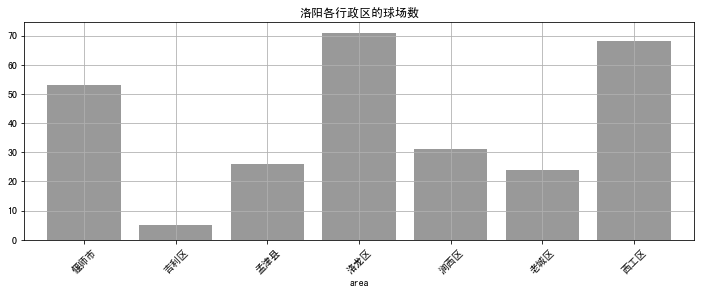

In [138]:
#统计各个区的球场数
df_q1 = df1.groupby('area').count()
df_q1
df_q1['detail'].plot(kind='bar',
       color = 'k',
       width = 0.8,
       alpha = 0.4,
       rot = 45,
       grid = True,
       #ylim = [0.98,1],
       figsize = (12,4),
       title = '洛阳各行政区的球场数')
plt.savefig('/Users/yangziyu/Data_science/basketball/court_num.jpg')

In [4]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/yangziyu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [43]:
import re
bool1=df1['name'].str.contains(r'.羽毛.')
filterdata=df1[bool1]
bool2=df1['name'].str.contains(r'.乒乓.')
filterping=df1[bool2]
ping_num=filterping.index.size
yumao_num=filterdata.index.size
print('洛阳羽毛球馆数：',yumao_num)
print('洛阳乒乓球馆数：',ping_num)
filterdata
#bool3=df1['name'].str.containsns(r'.[-羽毛][-乒乓].')
#basketball_data=df1['name'][bool3]

洛阳羽毛球馆数： 89
洛阳乒乓球馆数： 82


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,area,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
2,2,2,2,洛阳市洛龙区开元大道286号洛阳会展中心5楼,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.623741, 'lng': 112.437417}",超越羽毛球馆,河南省,NaN,(0379)65997636,215bd5e5e3b4534dddee8b57,34.623741,112.437417,运动健身;体育场馆
8,8,8,8,丽新路青少年宫,涧西区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.661976, 'lng': 112.416052}",洛阳市青少年宫-羽毛球馆,河南省,cead7693174b5420d42ce2b1,NaN,cead7693174b5420d42ce2b1,34.661976,112.416052,运动健身;体育场馆
10,10,10,10,河南省洛阳市涧西区汉口路14号,涧西区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.677066, 'lng': 112.371498}",河柴羽毛球毽球馆,河南省,afa8418de5e61a3e7bf79606,"13693792357,15703795402",afa8418de5e61a3e7bf79606,34.677066,112.371498,运动健身;体育场馆
12,12,12,12,河南省洛阳市西工区陵园路七号院,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.698192, 'lng': 112.43865}",海川羽毛球馆,河南省,NaN,(0379)60280091,7e8f85c13309ae7f21f017e7,34.698192,112.438650,运动健身;体育场馆
14,14,14,14,黄河路114号,涧西区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.661696, 'lng': 112.422381}",洛阳新动力羽毛球俱乐部,河南省,NaN,NaN,ab39b983107645acca213d53,34.661696,112.422381,运动健身;体育场馆
15,15,15,15,河南省洛阳市洛龙区李贺路与自强路交叉口西南150米,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.606731, 'lng': 112.420699}",河科大健身房羽毛球馆,河南省,b3bc20fa5578e64d8605bfbb,NaN,b3bc20fa5578e64d8605bfbb,34.606731,112.420699,运动健身;体育场馆
20,20,20,20,河南省洛阳市洛龙区洛阳理工学院大学生骨干培训学校,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.622262, 'lng': 112.426537}",洛阳理工学院羽毛球训练房,河南省,c0839b98fbd96686471a322c,NaN,c0839b98fbd96686471a322c,34.622262,112.426537,运动健身;体育场馆
22,22,22,22,河南省洛阳市西工区春都路126,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.694893, 'lng': 112.452021}",乾记羽毛球馆,河南省,NaN,13937907464,157539f6ab4352ecd13ce39b,34.694893,112.452021,运动健身;体育场馆
29,29,29,29,纱厂东路4号第1幢附近,西工区,洛阳市,1,"{'tag': '出入口;门', 'type': 'life', 'detail_url':...","{'lat': 34.685556, 'lng': 112.443089}",0379羽毛球俱乐部-东北门,河南省,681cbe5be56b0cd0081cc714,NaN,681cbe5be56b0cd0081cc714,34.685556,112.443089,出入口;门
30,30,30,30,黄河路114号,涧西区,洛阳市,1,"{'tag': '出入口;门', 'type': 'life', 'detail_url':...","{'lat': 34.661633, 'lng': 112.42249}",洛阳新动力羽毛球俱乐部-东北门,河南省,ed61b8f552d853ac9d95dee4,NaN,ed61b8f552d853ac9d95dee4,34.661633,112.422490,出入口;门


In [46]:
test1=list(filterdata.name)
test2=list(df1.name)
test3=list(filterping)
print(test1)
print(test2)

['超越羽毛球馆', '洛阳市青少年宫-羽毛球馆', '河柴羽毛球毽球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '河科大健身房羽毛球馆', '洛阳理工学院羽毛球训练房', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '超越羽毛球馆', '洛阳市青少年宫-羽毛球馆', '河柴羽毛球毽球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '河科大健身房羽毛球馆', '洛阳理工学院羽毛球训练房', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '洛阳市青少年宫-羽毛球馆', '河柴羽毛球毽球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '海川羽毛球馆', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '石化羽毛球馆', '超越羽毛球馆', '洛阳市青少年宫-羽毛球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '河科大健身房羽毛球馆', '洛阳理工学院羽毛球训练房', '乾记羽毛球馆', '偃师市佳一羽毛球俱乐部商都夜市球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '超越羽毛球馆', '洛阳市青少年宫-羽毛球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '河科大健身房羽毛球馆', '洛阳理工学院羽毛球训练房', '乾记羽毛球馆', '偃师市佳一羽毛球俱乐部商都夜市球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '洛阳市青少年宫-羽毛球馆', '海川羽毛球馆', '洛阳新动力羽毛球俱乐部', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '洛阳新动力羽毛球俱乐部-东北门', '海川羽毛球馆', '乾记羽毛球馆', '0379羽毛球俱乐部-东北门', '石化羽毛球馆', '乾记羽毛球馆', '佳一羽毛球俱乐部', '偃师市佳一羽毛球俱乐部商都夜市球馆', '乾记羽毛球馆', '佳一羽毛球俱乐部', '偃师市佳一羽毛球俱乐部商都夜市球馆', '乾记羽毛球馆', '佳一羽毛球俱乐部', '乾记羽毛球馆', '佳一羽毛球俱乐部', '石化羽毛球馆

In [47]:
ret=list(set(test2)^set(test1)^set(test3))
ret

['体育中心-室外篮球场',
 '博德篮球训练营',
 '洛阳理工学院开元校区篮球场',
 '篮球场',
 '新区体育中心篮球馆',
 '洛阳篮球公园',
 '洛阳理工学院篮球场',
 '乒乓球俱乐部',
 'Garden Court花园球馆(花卉市场店)',
 '河南科技大学开元校区-篮球场',
 '洛阳职业技术学院-篮球场',
 '袋鼠篮球公园',
 '春盈羽球馆',
 '篮球馆',
 '经典球俱乐部',
 '7号球馆']

In [48]:
basketball_data=df1[df1.name.isin(ret)]
basketball_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,area,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
0,0,0,0,河南省洛阳市洛龙区S319(洛宜公路),洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.664203, 'lng': 112.473752}",Garden Court花园球馆(花卉市场店),河南省,NaN,NaN,f46bd14fa5701566e215f955,34.664203,112.473752,运动健身;体育场馆
1,1,1,1,河南省洛阳市洛龙区太康路自行车赛场西侧,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.630555, 'lng': 112.436195}",体育中心-室外篮球场,河南省,430b7990b8a93698c2f1cf2e,NaN,430b7990b8a93698c2f1cf2e,34.630555,112.436195,运动健身;体育场馆
3,3,3,3,河南省洛阳市西工区汉宫路5号乾元木材公司院内,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.695521, 'lng': 112.426276}",7号球馆,河南省,NaN,"(0379)61129817,15138798770",d68f98c111a065154054d73d,34.695521,112.426276,运动健身;体育场馆
4,4,4,4,河南省洛阳市西工区纱厂北路4号纱厂北路丹尼斯向北100米(食品城),西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.691321, 'lng': 112.435232}",袋鼠篮球公园,河南省,NaN,18103796907,e7841c706f04b930c51e5128,34.691321,112.435232,运动健身;体育场馆
5,5,5,5,河南省洛阳市洛龙区洛河南岸洛阳新区,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.623437, 'lng': 112.440247}",新区体育中心篮球馆,河南省,806d4d9b577137be96ca0752,NaN,806d4d9b577137be96ca0752,34.623437,112.440247,运动健身;体育场馆
6,6,6,6,华夏路与春城路交叉口东南150米,涧西区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.625851, 'lng': 112.399772}",春盈羽球馆,河南省,NaN,(0379)60658167,f14e340c59b018194207c19a,34.625851,112.399772,运动健身;体育场馆
7,7,7,7,健康路与航空路交叉口南50米,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.671668, 'lng': 112.447659}",篮球馆,河南省,NaN,NaN,7b54f15737294c0481288a5a,34.671668,112.447659,运动健身;体育场馆
9,9,9,9,河南省洛阳市涧西区陇北二路19号,涧西区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.672487, 'lng': 112.387299}",乒乓球俱乐部,河南省,2ed0096b93a3a59008f5eb1e,NaN,2ed0096b93a3a59008f5eb1e,34.672487,112.387299,运动健身;体育场馆
11,11,11,11,自强路附近,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.607052, 'lng': 112.421895}",河南科技大学开元校区-篮球场,河南省,d5d6197ccd12bef7fa0cada0,NaN,d5d6197ccd12bef7fa0cada0,34.607052,112.421895,运动健身;体育场馆
13,13,13,13,安乐镇茹刘线,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.652203, 'lng': 112.505729}",洛阳篮球公园,河南省,04465935c028525eae080f56,13783171016,04465935c028525eae080f56,34.652203,112.505729,运动健身;体育场馆


In [50]:
basketball_num=basketball_data.index.size
print('洛阳篮球场数：',basketball_num)

洛阳篮球场数： 107


In [52]:
basketball_data['type']='basketball'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


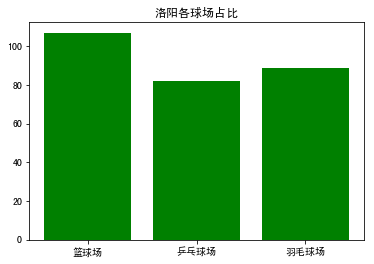

In [78]:
#各球场比例
import matplotlib.pyplot as plt
name_list = ['篮球场','乒乓球场','羽毛球场']
num_list = [basketball_num,ping_num,yumao_num]
plt.title('洛阳各球场占比')
plt.bar(range(len(num_list)), num_list,color='g',tick_label=name_list)
plt.show()
#plt.savefig('/Users/yangziyu/Data_science/basketball/court_percent.jpg')
#plt.close()

In [82]:
#根据各区做堆叠图
bd_data=basketball_data.groupby('area').count()
bd_data

,address,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag,type
area,,,,,,,,,,,,,,
偃师市,15,15,15,15,15,15,15,0,0,15,15,15,15,15
孟津县,10,10,10,10,10,10,10,10,0,10,10,10,10,10
洛龙区,38,38,38,38,38,38,38,29,9,38,38,38,38,38
涧西区,10,10,10,10,10,10,10,6,4,10,10,10,10,10
西工区,34,34,34,34,34,34,34,0,22,34,34,34,34,34


In [86]:
yd_data=filterdata.groupby('area').count()
yd_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
area,,,,,,,,,,,,,,,,
偃师市,23,23,23,23,23,23,23,23,23,23,0,0,23,23,23,23
吉利区,5,5,5,5,5,5,5,5,5,5,0,0,5,5,5,5
洛龙区,12,12,12,12,12,12,12,12,12,12,8,4,12,12,12,12
涧西区,21,21,21,21,21,21,21,21,21,21,15,3,21,21,21,21
西工区,28,28,28,28,28,28,28,28,28,28,8,20,28,28,28,28


In [87]:
bool2=df1['name'].str.contains(r'.乒乓.')
filterping=df1[bool2]
filterping

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,area,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
18,18,18,18,中州中路319金水湾大酒店,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.677683, 'lng': 112.447468}",金水湾大酒店-乒乓球,河南省,9fe3b0e265c6e07943ab9a8b,NaN,9fe3b0e265c6e07943ab9a8b,34.677683,112.447468,运动健身;体育场馆
23,23,23,23,机场西路九号洛阳新艺学院附近,孟津县,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.736794, 'lng': 112.385593}",洛阳空港产业集聚区乒乓球俱乐部,河南省,5b29714a99134ad405026f98,NaN,5b29714a99134ad405026f98,34.736794,112.385593,运动健身;体育场馆
24,24,24,24,中州东路青年宫4楼,老城区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.691855, 'lng': 112.48738}",乐旋乒乓球俱乐部,河南省,15465f0b95ca22ac774ff146,18939004129,15465f0b95ca22ac774ff146,34.691855,112.487380,运动健身;体育场馆
25,25,25,25,中州东路310号云天宾馆,老城区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.689634, 'lng': 112.48335}",云天宾馆-乒乓球厅,河南省,f5f1d8f5c7e3a70f91114c72,(0379)65277588,f5f1d8f5c7e3a70f91114c72,34.689634,112.483350,运动健身;体育场馆
27,27,27,27,开元大道239号钼都利豪国际饭店19层,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.622723, 'lng': 112.452235}",钼都利豪国际饭店-乒乓球室,河南省,1257f8ad389e3bedd0ff2331,(0379)65979999,1257f8ad389e3bedd0ff2331,34.622723,112.452235,运动健身;体育场馆
28,28,28,28,安乐街道洛阳桥南向南200米龙安宾馆,洛龙区,洛阳市,1,"{'tag': '教育培训', 'type': 'education', 'detail_u...","{'lat': 34.662949, 'lng': 112.473231}",洛阳陈涛乒乓球俱乐部,河南省,NaN,NaN,870658347387db67f4b916c8,34.662949,112.473231,教育培训
31,31,31,31,关林街道牡丹大道广利街交叉口向东一百五十米路南,洛龙区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.61713, 'lng': 112.473437}",红双喜乒乓球俱乐部,河南省,NaN,NaN,5ab3f8d01a667d02d92f28c3,34.617130,112.473437,运动健身;体育场馆
50,50,50,50,中州中路319金水湾大酒店,西工区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.677683, 'lng': 112.447468}",金水湾大酒店-乒乓球,河南省,9fe3b0e265c6e07943ab9a8b,NaN,9fe3b0e265c6e07943ab9a8b,34.677683,112.447468,运动健身;体育场馆
55,55,55,55,机场西路九号洛阳新艺学院附近,孟津县,洛阳市,1,"{'tag': '运动健身;体育场馆', 'type': 'life', 'detail_u...","{'lat': 34.736794, 'lng': 112.385593}",洛阳空港产业集聚区乒乓球俱乐部,河南省,5b29714a99134ad405026f98,NaN,5b29714a99134ad405026f98,34.736794,112.385593,运动健身;体育场馆
56,56,56,56,中州东路青年宫4楼,老城区,洛阳市,1,"{'tag': '运动健身;体育场馆', 'navi_location': {'lng': ...","{'lat': 34.691855, 'lng': 112.48738}",乐旋乒乓球俱乐部,河南省,15465f0b95ca22ac774ff146,18939004129,15465f0b95ca22ac774ff146,34.691855,112.487380,运动健身;体育场馆


In [110]:
pd_data=filterping.groupby('area').count()
pd_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,address,city,detail,detail_info,location,name,province,street_id,telephone,uid,lat,lng,tag
area,,,,,,,,,,,,,,,,
偃师市,15,15,15,15,15,15,15,15,15,15,0,0,15,15,15,15
孟津县,16,16,16,16,16,16,16,16,16,16,10,6,16,16,16,16
洛龙区,21,21,21,21,21,21,21,21,21,21,6,6,21,21,21,21
老城区,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
西工区,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6


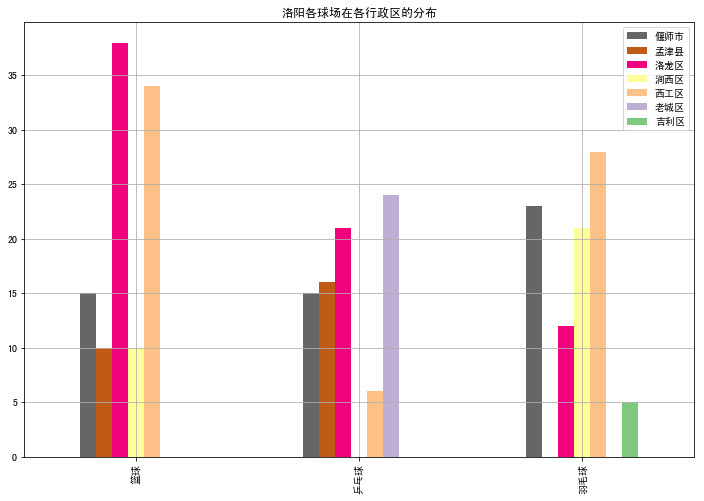

In [137]:
bd_data['篮球']=bd_data['address']
pd_data['乒乓球']=pd_data['address']
yd_data['羽毛球']=yd_data['address']
district_df=pd.DataFrame([bd_data['篮球'],pd_data['乒乓球'],yd_data['羽毛球']])
#bd_data
#district_df
# x=['篮球','乒乓球','羽毛球']
# y=[bd_data['篮球'],pd_data['乒乓球'],yd_data['羽毛球']]
# plt.plot()
pic=district_df.plot(kind='bar',grid = True,colormap='Accent_r',figsize=(12,8),title='洛阳各球场在各行政区的分布') 
plt.savefig('/Users/yangziyu/Data_science/basketball/district.jpg')

In [ ]:
#每个区的球场比例
